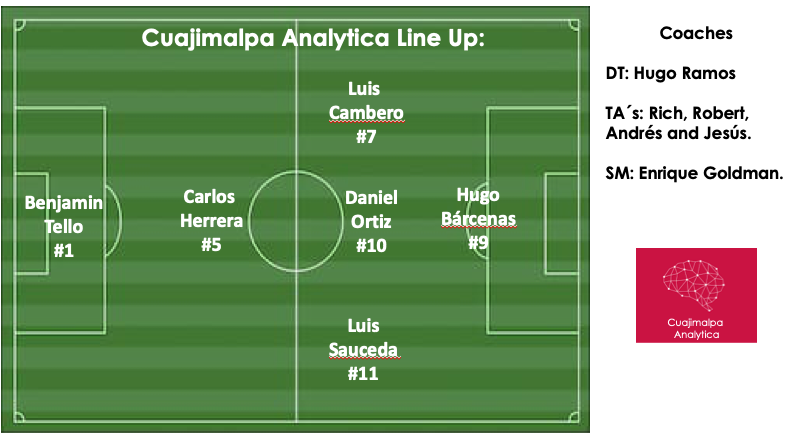

In [257]:
from IPython.display import Image
Image("presentación.png")

# Who is gonna be the winner of the next Ballon D'or 2019?

In this project the objective is to predict the player, based on his historical stat info from FIFA video games, who have more chances to win the competiton.

## First, we will analyze the 'winning criteria' of the former winners of the last 4 editions of the competition:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
#First we call the CSV files:#
fifa_stats_2015_df=pd.read_csv("datasets/players_15.csv",usecols = [2,4,10,11,16,18,31,32,33,34,35,36])
fifa_stats_2015_df.head()

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,27,93,95,5,4,93.0,89.0,86.0,96.0,27.0,63.0
1,Cristiano Ronaldo,29,92,92,5,5,93.0,93.0,81.0,91.0,32.0,79.0
2,A. Robben,30,90,90,5,4,93.0,86.0,83.0,92.0,32.0,64.0
3,Z. Ibrahimović,32,90,90,5,4,76.0,91.0,81.0,86.0,34.0,86.0
4,M. Neuer,28,90,90,5,1,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
fifa_stats_2016_df=pd.read_csv("datasets/players_16.csv",usecols = [2,4,10,11,16,18,31,32,33,34,35,36])
fifa_stats_2016_df.head()

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,28,94,95,5,4,92.0,88.0,86.0,95.0,24.0,62.0
1,Cristiano Ronaldo,30,93,93,5,5,92.0,93.0,80.0,91.0,33.0,78.0
2,A. Robben,31,90,90,5,4,92.0,86.0,82.0,92.0,32.0,64.0
3,M. Neuer,29,90,90,5,1,NaN,NaN,NaN,NaN,NaN,NaN
4,L. Suárez,28,90,90,5,4,83.0,88.0,79.0,87.0,42.0,79.0


In [5]:
fifa_stats_2017_df=pd.read_csv("datasets/players_17.csv",usecols = [2,4,10,11,16,18,31,32,33,34,35,36])
fifa_stats_2017_df.head()

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,Cristiano Ronaldo,31,94,94,5,5,92.0,92.0,81.0,91.0,33.0,80.0
1,L. Messi,29,93,93,5,4,89.0,90.0,86.0,96.0,26.0,61.0
2,Neymar,24,92,95,5,5,91.0,84.0,78.0,95.0,30.0,56.0
3,M. Neuer,30,92,92,5,1,NaN,NaN,NaN,NaN,NaN,NaN
4,L. Suárez,29,92,92,5,4,82.0,90.0,79.0,87.0,42.0,79.0


In [6]:
fifa_stats_2018_df=pd.read_csv("datasets/players_18.csv",usecols = [2,4,10,11,16,18,31,32,33,34,35,36])
fifa_stats_2018_df

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,Cristiano Ronaldo,32,94,94,5,5,90.0,93.0,82.0,90.0,33.0,80.0
1,L. Messi,30,93,93,5,4,89.0,90.0,86.0,96.0,26.0,61.0
2,Neymar,25,92,94,5,5,92.0,84.0,79.0,95.0,30.0,60.0
3,M. Neuer,31,92,92,5,1,NaN,NaN,NaN,NaN,NaN,NaN
4,L. Suárez,30,92,92,5,4,82.0,90.0,79.0,87.0,42.0,81.0
5,R. Lewandowski,28,91,91,4,3,81.0,88.0,75.0,86.0,38.0,82.0
6,De Gea,26,90,92,4,1,NaN,NaN,NaN,NaN,NaN,NaN
7,E. Hazard,26,90,91,4,4,90.0,82.0,84.0,92.0,32.0,66.0
8,Sergio Ramos,31,90,90,4,3,76.0,63.0,71.0,71.0,88.0,83.0
9,G. Higuaín,29,90,90,4,3,79.0,87.0,70.0,83.0,25.0,74.0


In [7]:
fifa_stats_2019_df=pd.read_csv("datasets/players_19.csv",usecols = [2,4,10,11,16,18,31,32,33,34,35,36])
fifa_stats_2019_df.head(50)

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,Cristiano Ronaldo,33,94,94,5,5,90.0,93.0,81.0,89.0,35.0,79.0
1,L. Messi,31,94,94,5,4,88.0,91.0,88.0,96.0,32.0,61.0
2,Neymar Jr,26,92,93,5,5,92.0,84.0,83.0,95.0,32.0,59.0
3,De Gea,27,91,93,4,1,NaN,NaN,NaN,NaN,NaN,NaN
4,K. De Bruyne,27,91,92,4,4,77.0,86.0,92.0,87.0,60.0,78.0
5,Sergio Ramos,32,91,91,4,3,75.0,63.0,71.0,71.0,91.0,84.0
6,L. Suárez,31,91,91,5,3,80.0,90.0,79.0,88.0,52.0,85.0
7,L. Modrić,32,91,91,4,4,76.0,76.0,90.0,91.0,70.0,67.0
8,E. Hazard,27,91,91,4,4,91.0,82.0,86.0,94.0,35.0,67.0
9,J. Oblak,25,90,93,3,1,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
fifa_stats_2020_df=pd.read_csv("datasets/players_20.csv",usecols = [2,4,10,11,16,18,31,32,33,34,35,36])
fifa_stats_2020_df.head(50)

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,32,94,94,5,4,87.0,92.0,92.0,96.0,39.0,66.0
1,Cristiano Ronaldo,34,93,93,5,5,90.0,93.0,82.0,89.0,35.0,78.0
2,Neymar Jr,27,92,92,5,5,91.0,85.0,87.0,95.0,32.0,58.0
3,J. Oblak,26,91,93,3,1,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,91,91,4,4,91.0,83.0,86.0,94.0,35.0,66.0
5,K. De Bruyne,28,91,91,4,4,76.0,86.0,92.0,86.0,61.0,78.0
6,M. ter Stegen,27,90,93,3,1,NaN,NaN,NaN,NaN,NaN,NaN
7,V. van Dijk,27,90,91,3,2,77.0,60.0,70.0,71.0,90.0,86.0
8,L. Modrić,33,90,90,4,4,74.0,76.0,89.0,89.0,72.0,66.0
9,M. Salah,27,90,90,3,4,93.0,86.0,81.0,89.0,45.0,74.0


In [9]:
#FUNCTION TO OBTAIN THE DIRECTORY OF EACH FILE
import glob
files = glob.glob('datasets/*.csv')
print(files)

['datasets/players_20.csv', 'datasets/players_18.csv', 'datasets/players_19.csv', 'datasets/players_18_BTB.csv', 'datasets/players_17.csv', 'datasets/players_16.csv', 'datasets/players_15.csv', 'datasets/teams_and_leagues.csv']


In [10]:
for f in files:
   print(f)

datasets/players_20.csv
datasets/players_18.csv
datasets/players_19.csv
datasets/players_18_BTB.csv
datasets/players_17.csv
datasets/players_16.csv
datasets/players_15.csv
datasets/teams_and_leagues.csv


## With the datasets we made a proposal to select certain "inputs", that determine the performance of each player:


 - Name (short_name)
 
 
 - Age (age)
 
 
 - Effectivity (overall):  is the average of the key Player Attributes rates of a player within their Potential rate calculated based on their position and international reputation. The OVR rating of a player determines their general performance quality and their value in FIFA. (Score (0-100))
 
 
 - Potential (potential): Player’s response to the multiple environmental interactions and stimuli that are presented day by day (Score (0-100))
 
 
 - Reputation (international_reputation): (Score(1-5))
 
 
 - Skills (skill_moves): Act or task that has a goal to achieve and requires voluntary body or limb movement to be properly performed(Score(1-5))
 
 
 - Pace (pace): Player Attribute in FIFA that determines a player’s speed in walking and running (Score (0-100))
 
 
 - Shooting (shooting): is a Player Attribute in FIFA that determines a player’s general shooting strength and accuracy (Score (0-100))
 
 - Passing (passing): Is a Player Attribute in FIFA that determines how accurate a player passes the ball to a teammate (Score (0-100))
 
 
 - Dribbling (dribbling): Is a Player Attribute in FIFA that determines a player’s ability to carry the ball and past an opponent while being in control (Score (0-100))
 
 
 - Defending (defending): Is a Player Attribute in FIFA that determines a player’s ability to defend. (Score (0-100))
 
 
 - Physic (physic): also knows as Physicality, is a Player Attribute in FIFA that represents the physical and body status of a player. Players with high PHY rating, are able to win the physical battles on the pitch and maintain their fitness throughout a full match (Score (0-100))

## We start cleaning the data frames, by filtering with the correspondant nominees of each year:

In [11]:
# 2015 gold ballon finalists
finalists_2015 = ['L. Messi' , 'Cristiano Ronaldo', 'Neymar', 'R. Lewandowski', 'L. Suárez', 'T. Müller',
                 'M. Neuer', 'E. Hazard', 'Andrés Iniesta', 'A. Sánchez', 'Z. Ibrahimovic', 'Y. Touré',
                 'S. Agüero', 'J. Mascherano', 'P. Pogba', 'G. Bale', 'A. Vidal', 'K. De Bruyne',
                 'J. Rodríguez', 'K. Benzema', 'T. Kroos', 'P. Guerrero']

In [12]:
finalists_2015_Df = fifa_stats_2015_df[fifa_stats_2015_df['short_name'].isin(finalists_2015)]
finalists_2015_Df=finalists_2015_Df.dropna()
finalists_2015_Df=finalists_2015_Df.loc[finalists_2015_Df['overall']>79]
finalists_2015_Df=finalists_2015_Df.reset_index(drop=True)
##finalists_2015_Df['age2']=np.power((finalists_2015_Df['age']),2)
finalists_2015_Df

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,27,93,95,5,4,93.0,89.0,86.0,96.0,27.0,63.0
1,Cristiano Ronaldo,29,92,92,5,5,93.0,93.0,81.0,91.0,32.0,79.0
2,L. Suárez,27,89,91,5,4,83.0,87.0,79.0,88.0,42.0,79.0
3,E. Hazard,23,88,90,4,4,90.0,82.0,84.0,91.0,32.0,64.0
4,G. Bale,24,87,91,4,4,94.0,83.0,83.0,84.0,63.0,81.0
5,R. Lewandowski,25,87,89,4,4,80.0,84.0,74.0,85.0,39.0,78.0
6,J. Rodríguez,22,86,92,4,4,79.0,80.0,84.0,85.0,40.0,72.0
7,Neymar,22,86,91,5,5,90.0,80.0,72.0,92.0,30.0,58.0
8,T. Müller,24,86,88,4,3,81.0,84.0,82.0,80.0,46.0,72.0
9,S. Agüero,26,86,87,4,4,88.0,86.0,77.0,88.0,28.0,66.0


In [13]:
finalists_2015_Df.describe()

,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,25.333333,86.222222,88.888889,3.944444,3.777778,82.055556,81.722222,79.500000,84.833333,48.055556,73.944444
std,2.807553,2.961628,2.826115,0.802366,0.732084,9.276613,6.849693,4.973459,6.041523,19.815241,8.901237
min,21.000000,81.000000,83.000000,2.000000,2.000000,58.000000,59.000000,70.000000,69.000000,27.000000,58.000000
25%,23.250000,85.000000,87.000000,4.000000,3.250000,77.250000,80.000000,75.500000,82.000000,32.000000,66.750000
50%,25.000000,86.000000,88.500000,4.000000,4.000000,82.000000,82.000000,80.000000,84.500000,40.500000,73.000000
75%,27.000000,87.000000,91.000000,4.000000,4.000000,89.500000,84.000000,82.750000,88.000000,61.750000,79.750000
max,31.000000,93.000000,95.000000,5.000000,5.000000,94.000000,93.000000,89.000000,96.000000,84.000000,90.000000


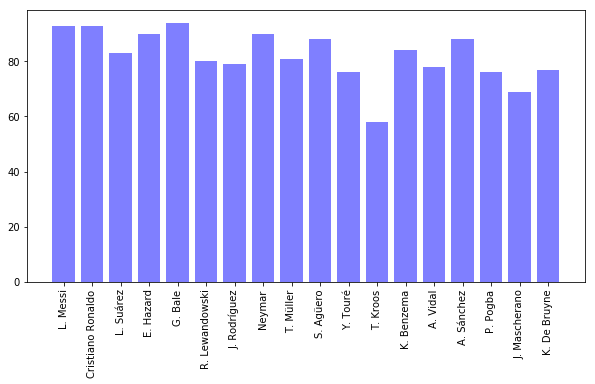

In [14]:
x_axis = np.arange(len(finalists_2015_Df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, finalists_2015_Df["pace"], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, finalists_2015_Df["short_name"], rotation="vertical")
plt.show()


### DATA ANALYSIS

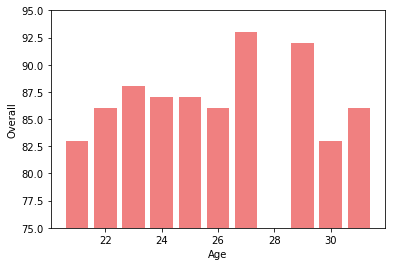

In [15]:
plt.bar('age', 'overall', data = finalists_2015_Df, color = 'lightcoral')
plt.xlabel("Age")
plt.ylabel("Overall")
plt.ylim(75,95)
plt.show()

In [16]:
finalists_2015_Df.corr()

,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
age,1.000000,0.301843,-0.284191,0.217605,-0.391133,-0.039149,-0.053019,-0.172722,-0.287842,0.298881,0.405641
overall,0.301843,1.000000,0.776202,0.847142,0.403944,0.573331,0.667248,0.363415,0.679430,-0.443263,-0.142311
potential,-0.284191,0.776202,1.000000,0.671587,0.669720,0.588108,0.657713,0.456173,0.836036,-0.537697,-0.306585
international_reputation,0.217605,0.847142,0.671587,1.000000,0.378315,0.427198,0.564289,0.199000,0.592582,-0.366076,-0.156946
skill_moves,-0.391133,0.403944,0.669720,0.378315,1.000000,0.694856,0.667339,-0.016156,0.802418,-0.724943,-0.372110
pace,-0.039149,0.573331,0.588108,0.427198,0.694856,1.000000,0.550149,-0.083511,0.653013,-0.581794,-0.306283
shooting,-0.053019,0.667248,0.657713,0.564289,0.667339,0.550149,1.000000,0.442903,0.760716,-0.637399,-0.182612
passing,-0.172722,0.363415,0.456173,0.199000,-0.016156,-0.083511,0.442903,1.000000,0.323999,-0.036112,-0.043184
dribbling,-0.287842,0.679430,0.836036,0.592582,0.802418,0.653013,0.760716,0.323999,1.000000,-0.754165,-0.570074
defending,0.298881,-0.443263,-0.537697,-0.366076,-0.724943,-0.581794,-0.637399,-0.036112,-0.754165,1.000000,0.750403


In [17]:
import numpy as np
split = np.random.rand(len(finalists_2015_Df)) < 0.875
train = finalists_2015_Df[split]
test = finalists_2015_Df[~split]
print(test)

   short_name  age  overall  potential  international_reputation  skill_moves  \
4     G. Bale   24       87         91                         4            4   
9   S. Agüero   26       86         87                         4            4   
13   A. Vidal   27       85         87                         4            3   

    pace  shooting  passing  dribbling  defending  physic  
4   94.0      83.0     83.0       84.0       63.0    81.0  
9   88.0      86.0     77.0       88.0       28.0    66.0  
13  78.0      78.0     80.0       81.0       81.0    83.0  


In [18]:
regr = linear_model.LinearRegression()

In [19]:
print(train)

           short_name  age  overall  potential  international_reputation  \
0            L. Messi   27       93         95                         5   
1   Cristiano Ronaldo   29       92         92                         5   
2           L. Suárez   27       89         91                         5   
3           E. Hazard   23       88         90                         4   
5      R. Lewandowski   25       87         89                         4   
6        J. Rodríguez   22       86         92                         4   
7              Neymar   22       86         91                         5   
8           T. Müller   24       86         88                         4   
10           Y. Touré   31       86         86                         4   
11           T. Kroos   24       85         88                         4   
12         K. Benzema   26       85         87                         4   
14         A. Sánchez   25       84         88                         3   
15          

In [20]:
finalists_2015_Df.columns

Index(['short_name', 'age', 'overall', 'potential', 'international_reputation',
       'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic'],
      dtype='object')

In [21]:
## Trainig & fitting the model
fifa_x_train = train[['potential', 'international_reputation',
       'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic']]
fifa_y_train = train[['overall']]
poly = PolynomialFeatures(degree=2)
fifa_x_train_poly = poly.fit_transform(fifa_x_train)
regr.fit(fifa_x_train_poly, fifa_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
## Testing the model
fifa_x_test = test[['potential', 'international_reputation',
       'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic']]
fifa_y_test = test[['overall']]
fifa_x_test_poly = poly.fit_transform(fifa_x_test)

In [23]:
df_fifa_pred = regr.predict(fifa_x_test_poly)

In [24]:
r2_score(fifa_y_test, df_fifa_pred)

-2.28630310460135

In [25]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(fifa_y_test, df_fifa_pred)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

Pearson Correlation Coefficient:  [0.93194581] and a P-value of: [0.23622009]


In [26]:
fifa_x_test['Predicted Ratings'] = df_fifa_pred

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_fifa2 = pd.merge(finalists_2015_Df,fifa_x_test)
df_fifa2.head(20)

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic,Predicted Ratings
0,G. Bale,24,87,91,4,4,94.0,83.0,83.0,84.0,63.0,81.0,89.555817
1,S. Agüero,26,86,87,4,4,88.0,86.0,77.0,88.0,28.0,66.0,85.823798
2,A. Vidal,27,85,87,4,3,78.0,78.0,80.0,81.0,81.0,83.0,85.096744


In [28]:
df_fifa_pred2 = regr.predict(fifa_x_train_poly)
fifa_x_train['Predicted Ratings'] = df_fifa_pred2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
df_fifa3 = pd.merge(finalists_2015_Df,fifa_x_train)
df_fifa3.head(20)

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic,Predicted Ratings
0,L. Messi,27,93,95,5,4,93.0,89.0,86.0,96.0,27.0,63.0,93.0
1,Cristiano Ronaldo,29,92,92,5,5,93.0,93.0,81.0,91.0,32.0,79.0,92.0
2,L. Suárez,27,89,91,5,4,83.0,87.0,79.0,88.0,42.0,79.0,89.0
3,E. Hazard,23,88,90,4,4,90.0,82.0,84.0,91.0,32.0,64.0,88.0
4,R. Lewandowski,25,87,89,4,4,80.0,84.0,74.0,85.0,39.0,78.0,87.0
5,J. Rodríguez,22,86,92,4,4,79.0,80.0,84.0,85.0,40.0,72.0,86.0
6,Neymar,22,86,91,5,5,90.0,80.0,72.0,92.0,30.0,58.0,86.0
7,T. Müller,24,86,88,4,3,81.0,84.0,82.0,80.0,46.0,72.0,86.0
8,Y. Touré,31,86,86,4,3,76.0,82.0,81.0,79.0,80.0,90.0,86.0
9,T. Kroos,24,85,88,4,3,58.0,81.0,89.0,84.0,58.0,69.0,85.0


In [30]:
df_Potential = finalists_2015_Df.loc[:, "potential"].values.reshape(-1, 1) 
df_Overall = finalists_2015_Df.loc[:, "overall"].values.reshape(-1, 1)

In [31]:
regr.fit(df_Potential, df_Overall) 
pred1 = regr.predict(df_Potential)

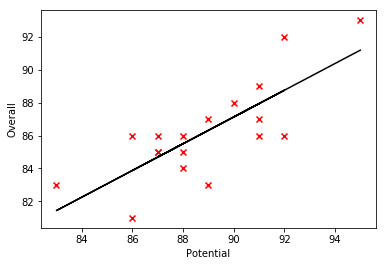

In [32]:
plt.scatter('potential', 'overall', data = finalists_2015_Df, marker = 'x', color = 'red')
plt.xlabel("Potential")
plt.ylabel("Overall")
plt.plot(df_Potential,pred1, color='black')
plt.show()

In [33]:
finalists_2015_Df.columns

Index(['short_name', 'age', 'overall', 'potential', 'international_reputation',
       'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic'],
      dtype='object')

### Machine learning/Linear regression

In [34]:
##split = np.random.rand(len(finalists_2015_Df)) < 0.875
#train = finalists_2015_Df[split]
#test = finalists_2015_Df[~split]

In [35]:
X= finalists_2015_Df[['age', 'potential', 'international_reputation',
       'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic']]
y= finalists_2015_Df['overall'].values.reshape(-1,1)
print(X.shape,y.shape)

(18, 10) (18, 1)


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [37]:
regr = linear_model.LinearRegression()

In [38]:
regr.fit(X_train, y_train)
training_score = regr.score(X_train, y_train)
testing_score = regr.score(X_test, y_test)
### END SOLUTION
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9856405156582562
Testing Score: 0.7382655659668435


In [40]:
# 2016 gold ballon finalists
finalists_2016 = ['Cristiano Ronaldo', 'L. Messi', 'A. Griezmann', 'L. Suárez', 'Neymar Jr', 'G. Bale',
                'R. Mahrez', 'J. Vardy', 'G. Buffon', 'Pepe', 'P. Aubameyang', 'Rui Patricio',
                'Z. Ibrahimovic', 'A. Vidal', 'P. Pogba', 'R. Lewandowski', 'T. Kroos', 'L. Modrić',
                'D. Payet', 'Sergio Ramos', 'Andrés Iniesta', 'Koke', 'T. Müller', 'M. Neuer',
                'H. Lloris', 'G. Higuaín', 'D. Godín', 'K. De Bruyne', 'S. Agüero']

In [41]:
finalists_2016_Df = fifa_stats_2016_df[fifa_stats_2016_df['short_name'].isin(finalists_2016)]
finalists_2016_Df=finalists_2016_Df.dropna()
finalists_2016_Df=finalists_2016_Df.loc[finalists_2016_Df['overall']>79]
finalists_2016_Df=finalists_2016_Df.reset_index(drop=True)
finalists_2016_Df


,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,28,94,95,5,4,92.0,88.0,86.0,95.0,24.0,62.0
1,Cristiano Ronaldo,30,93,93,5,5,92.0,93.0,80.0,91.0,33.0,78.0
2,L. Suárez,28,90,90,5,4,83.0,88.0,79.0,87.0,42.0,79.0
3,G. Bale,25,87,91,4,4,94.0,83.0,82.0,84.0,63.0,81.0
4,T. Kroos,25,87,90,4,3,56.0,81.0,88.0,82.0,66.0,69.0
5,R. Lewandowski,26,87,89,4,3,80.0,85.0,74.0,84.0,38.0,80.0
6,S. Agüero,27,87,87,4,4,89.0,87.0,77.0,89.0,23.0,68.0
7,Sergio Ramos,29,87,87,4,3,79.0,63.0,72.0,69.0,87.0,81.0
8,L. Modrić,29,87,87,4,4,76.0,75.0,84.0,89.0,71.0,68.0
9,P. Pogba,22,86,92,4,4,77.0,80.0,82.0,86.0,74.0,88.0


In [42]:
finalists_2016_Df.describe()

,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,26.750000,86.250000,88.000000,3.700000,3.450000,80.150000,78.150000,77.950000,81.350000,52.400000,74.750000
std,2.531382,3.258592,3.340344,0.801315,0.759155,9.309164,11.753051,7.850411,8.934116,22.834415,6.718983
min,22.000000,81.000000,81.000000,2.000000,2.000000,56.000000,48.000000,58.000000,59.000000,22.000000,62.000000
25%,25.000000,84.000000,86.000000,3.000000,3.000000,76.750000,75.750000,74.750000,80.500000,36.000000,68.750000
50%,27.000000,86.000000,87.500000,4.000000,3.500000,78.000000,81.000000,80.000000,83.000000,45.000000,74.000000
75%,28.250000,87.000000,90.000000,4.000000,4.000000,86.000000,85.000000,83.250000,86.250000,71.750000,80.250000
max,32.000000,94.000000,95.000000,5.000000,5.000000,95.000000,93.000000,88.000000,95.000000,87.000000,88.000000


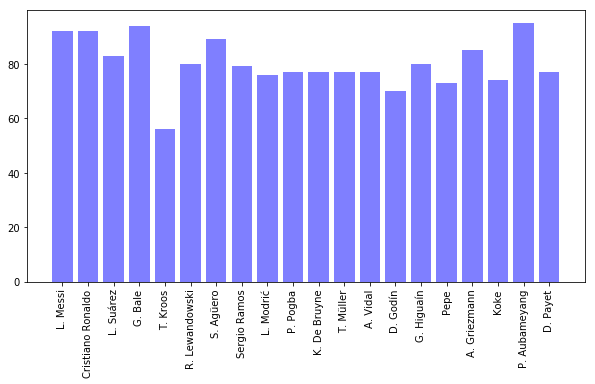

In [43]:
x_axis = np.arange(len(finalists_2016_Df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, finalists_2016_Df["pace"], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, finalists_2016_Df["short_name"], rotation="vertical")
plt.show()

In [44]:
# 2017 gold ballon finalists
finalists_2017 = ['Neymar Jr', 'L. Modrić', 'P. Dybala', 'Marcelo', 'N. Kanté', 'L. Suárez', 'Sergio Ramos', 'J. Oblak',
                 'Coutinho', 'D. Mertens', 'K. De Bruyne', 'R. Lewandowski', 'De Gea', 'H. Kane', 'Dzeko', 'A. Griezmann',
                 'T. Kroos', 'G. Buffon', 'S. Mané', 'Falcao', 'L. Messi', 'P. Aubameyang', 'E. Cavani', 'M. Hummels',
                 'K. Benzema', 'Cristiano Ronaldo', 'E. Hazard', 'L. Bonucci', 'Isco', 'K. Mbappe']

In [45]:
finalists_2017_Df = fifa_stats_2017_df[fifa_stats_2017_df['short_name'].isin(finalists_2017)].sort_values(by=['short_name'])
finalists_2017_Df=finalists_2017_Df.dropna()
finalists_2017_Df=finalists_2017_Df.loc[finalists_2017_Df['overall']>79]
finalists_2017_Df=finalists_2017_Df.reset_index(drop=True)
finalists_2017_Df

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,A. Griezmann,25,88,92,4,4,86.0,85.0,78.0,87.0,30.0,67.0
1,Coutinho,24,85,89,3,4,82.0,74.0,82.0,87.0,33.0,56.0
2,Cristiano Ronaldo,31,94,94,5,5,92.0,92.0,81.0,91.0,33.0,80.0
3,D. Mertens,29,83,83,3,4,89.0,75.0,78.0,87.0,36.0,55.0
4,E. Cavani,29,85,85,4,3,76.0,83.0,71.0,79.0,42.0,80.0
5,E. Hazard,25,88,90,4,4,90.0,81.0,82.0,91.0,32.0,64.0
6,Falcao,30,81,81,3,3,71.0,80.0,64.0,78.0,37.0,72.0
7,H. Kane,22,84,90,3,3,73.0,84.0,71.0,78.0,42.0,81.0
8,Isco,24,84,88,3,4,72.0,75.0,80.0,87.0,39.0,62.0
9,K. Benzema,28,87,87,4,4,81.0,84.0,77.0,82.0,22.0,74.0


In [46]:
finalists_2017_Df.describe()

,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
count,23.000000,23.000000,23.000000,23.00000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000,23.000000
mean,27.000000,86.956522,88.565217,3.73913,3.521739,78.913043,78.130435,77.391304,83.00000,48.608696,72.391304
std,2.611165,3.377442,3.230903,0.68870,0.730477,10.841474,10.380508,6.228520,7.00649,22.812953,8.820117
min,22.000000,81.000000,81.000000,3.00000,2.000000,45.000000,53.000000,64.000000,69.00000,22.000000,55.000000
25%,25.000000,85.000000,87.000000,3.00000,3.000000,73.500000,74.500000,74.000000,78.50000,33.000000,66.000000
50%,27.000000,87.000000,89.000000,4.00000,4.000000,80.000000,81.000000,78.000000,84.00000,39.000000,74.000000
75%,29.000000,88.500000,90.500000,4.00000,4.000000,87.000000,84.500000,81.500000,87.00000,70.500000,80.000000
max,31.000000,94.000000,94.000000,5.00000,5.000000,96.000000,92.000000,88.000000,96.00000,88.000000,83.000000


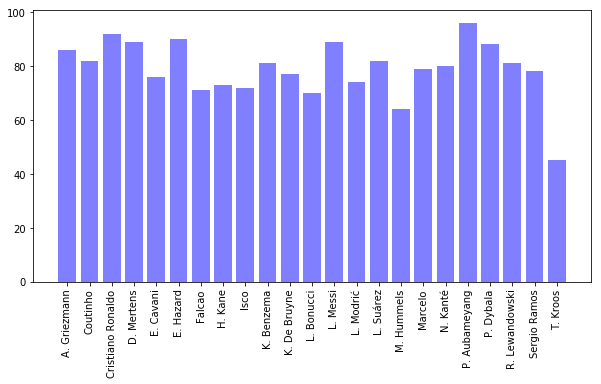

In [47]:
x_axis = np.arange(len(finalists_2017_Df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, finalists_2017_Df["pace"], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, finalists_2017_Df["short_name"], rotation="vertical")
plt.show()

In [48]:
# 2018 gold ballon finalists
finalists_2018 = ['S. Agüero' , 'Alisson', 'G. Bale', 'K. Benzema', 'E. Cavani', 'T. Courtois',
                 'Cristiano Ronaldo', 'K. De Bruyne', 'Roberto Firmino', 'D. Godín', 'A. Griezmann', 'E. Hazard',
                 'Isco','H. Kane','N. Kanté','H. Lloris','M. Mandzukic','S. Mané','Marcelo','K. Mbappe','L. Messi',
                  'L. Modrić','Neymar Jr','J. Oblak','P. Pogba','I. Rakitić','Sergio Ramos','M. Salah','L. Suárez',
                  'R. Varane']


In [49]:
finalists_2018_Df = fifa_stats_2018_df[fifa_stats_2018_df['short_name'].isin(finalists_2018)]
finalists_2018_Df=finalists_2018_Df.dropna()
finalists_2018_Df=finalists_2018_Df.loc[finalists_2018_Df['overall']>79]
finalists_2018_Df=finalists_2018_Df.reset_index(drop=True)
finalists_2018_Df

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,Cristiano Ronaldo,32,94,94,5,5,90.0,93.0,82.0,90.0,33.0,80.0
1,L. Messi,30,93,93,5,4,89.0,90.0,86.0,96.0,26.0,61.0
2,L. Suárez,30,92,92,5,4,82.0,90.0,79.0,87.0,42.0,81.0
3,E. Hazard,26,90,91,4,4,90.0,82.0,84.0,92.0,32.0,66.0
4,Sergio Ramos,31,90,90,4,3,76.0,63.0,71.0,71.0,88.0,83.0
5,K. De Bruyne,26,89,92,4,4,75.0,84.0,88.0,85.0,45.0,75.0
6,S. Agüero,29,89,89,4,4,87.0,88.0,75.0,89.0,23.0,72.0
7,G. Bale,27,89,89,4,4,94.0,87.0,84.0,86.0,57.0,76.0
8,L. Modrić,31,89,89,4,4,73.0,75.0,86.0,89.0,72.0,65.0
9,A. Griezmann,26,88,91,4,4,86.0,85.0,78.0,87.0,30.0,68.0


In [50]:
finalists_2018_Df.describe()

,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000
mean,27.521739,87.782609,89.521739,3.782609,3.695652,80.173913,78.130435,78.043478,83.347826,52.086957,74.73913
std,2.728129,2.859697,2.352360,0.671262,0.764840,8.710767,12.578135,6.944444,8.082578,21.802654,7.64685
min,23.000000,83.000000,86.000000,3.000000,2.000000,65.000000,45.000000,61.000000,63.000000,22.000000,61.00000
25%,25.000000,86.000000,87.000000,3.000000,3.000000,74.500000,74.000000,74.500000,81.000000,34.500000,67.00000
50%,27.000000,87.000000,90.000000,4.000000,4.000000,78.000000,83.000000,79.000000,85.000000,45.000000,76.00000
75%,30.000000,89.000000,91.500000,4.000000,4.000000,88.000000,86.000000,84.000000,88.000000,70.000000,80.50000
max,32.000000,94.000000,94.000000,5.000000,5.000000,94.000000,93.000000,88.000000,96.000000,88.000000,88.00000


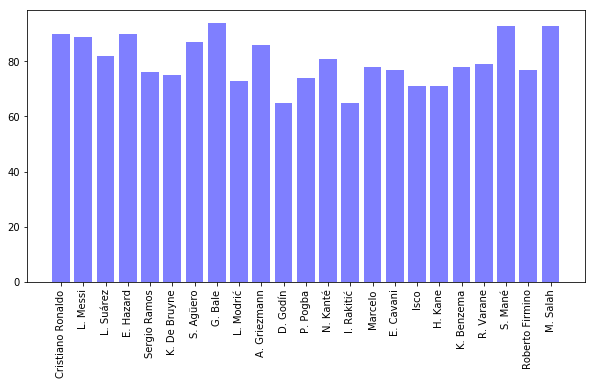

In [51]:
x_axis = np.arange(len(finalists_2018_Df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, finalists_2018_Df["pace"], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, finalists_2018_Df["short_name"], rotation="vertical")
plt.show()

In [52]:
#finalists 2019
finalists_2019 = ['S. Agüero', 'T. Alexander-Arnold', 'Alisson', 'P. Aubameyang', 'K. Benzema', 'Bernardo Silva', 'Cristiano Ronaldo', 'K. De Bruyne'
'F. de Jong', 'M de Ligt','Roberto Firmino', 'A. Griezmann', 'E. Hazard', 'Joao Felix', 'K. Koulibaly', 'R. Lewandowski', 'H. Lloris', 'S. Mané', 'R. Mahrez',
'Marquinhos', 'K. Mbappe', 'L. Messi', 'M. Salah', 'H. Son', 'R. Sterling', 'D. Tadic', 'M. ter Stegen', 'D. van de Beek', 'V. van Dijk', 'G. Wijnaldum']

In [53]:
finalists_2019_Df = fifa_stats_2019_df[fifa_stats_2019_df['short_name'].isin(finalists_2019)]
finalists_2019_Df=finalists_2019_Df.dropna()
finalists_2019_Df=finalists_2019_Df.loc[finalists_2019_Df['overall']>79]
finalists_2019_Df=finalists_2019_Df.reset_index(drop=True)
finalists_2019_Df

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,Cristiano Ronaldo,33,94,94,5,5,90.0,93.0,81.0,89.0,35.0,79.0
1,L. Messi,31,94,94,5,4,88.0,91.0,88.0,96.0,32.0,61.0
2,E. Hazard,27,91,91,4,4,91.0,82.0,86.0,94.0,35.0,67.0
3,R. Lewandowski,29,90,90,4,4,78.0,89.0,75.0,85.0,41.0,82.0
4,A. Griezmann,27,89,90,4,4,86.0,86.0,81.0,89.0,50.0,70.0
5,S. Agüero,30,89,89,4,4,84.0,89.0,76.0,89.0,28.0,73.0
6,M. Salah,26,88,89,3,4,92.0,84.0,79.0,89.0,45.0,72.0
7,K. Koulibaly,27,87,90,3,2,72.0,26.0,46.0,59.0,88.0,86.0
8,P. Aubameyang,29,87,87,3,4,94.0,84.0,75.0,80.0,37.0,70.0
9,Roberto Firmino,26,86,88,3,4,77.0,83.0,80.0,86.0,61.0,78.0


In [54]:
finalists_2019_Df.describe()

,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,27.157895,87.052632,88.421053,3.421053,3.789474,83.473684,76.052632,76.210526,84.000000,49.473684,71.578947
std,2.651271,3.390734,2.968647,0.768533,0.854982,7.791508,17.513403,8.898058,9.345231,19.253769,8.630152
min,23.000000,82.000000,83.000000,2.000000,2.000000,71.000000,26.000000,46.000000,59.000000,28.000000,56.000000
25%,26.000000,84.500000,87.000000,3.000000,4.000000,76.500000,72.500000,75.500000,82.000000,36.000000,67.500000
50%,27.000000,86.000000,89.000000,3.000000,4.000000,85.000000,82.000000,76.000000,87.000000,42.000000,73.000000
75%,29.000000,89.000000,90.000000,4.000000,4.000000,90.500000,85.500000,81.000000,89.000000,55.500000,77.000000
max,33.000000,94.000000,94.000000,5.000000,5.000000,94.000000,93.000000,88.000000,96.000000,88.000000,86.000000


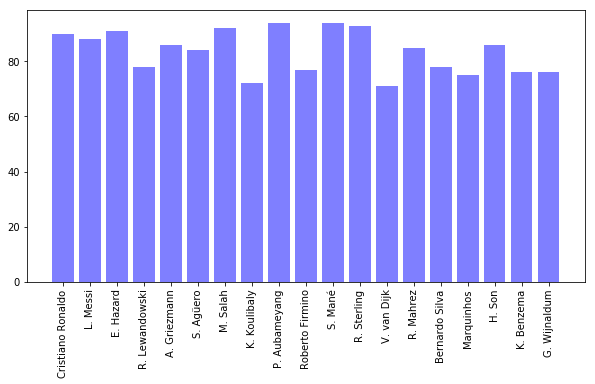

In [55]:
x_axis = np.arange(len(finalists_2019_Df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, finalists_2019_Df["pace"], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, finalists_2019_Df["short_name"], rotation="vertical")
plt.show()

## Here we use polynomial regression for this model

In [56]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [151]:
import numpy as np
split = np.random.rand(len(finalists_2019_Df)) < 0.7
train = finalists_2019_Df[split]
test = finalists_2019_Df[~split]
print(test)

           short_name  age  overall  potential  international_reputation  \
0   Cristiano Ronaldo   33       94         94                         5   
1            L. Messi   31       94         94                         5   
2           E. Hazard   27       91         91                         4   
4        A. Griezmann   27       89         90                         4   
14     Bernardo Silva   23       84         90                         2   
16             H. Son   25       84         85                         3   
18       G. Wijnaldum   27       82         83                         3   

    skill_moves  pace  shooting  passing  dribbling  defending  physic  
0             5  90.0      93.0     81.0       89.0       35.0    79.0  
1             4  88.0      91.0     88.0       96.0       32.0    61.0  
2             4  91.0      82.0     86.0       94.0       35.0    67.0  
4             4  86.0      86.0     81.0       89.0       50.0    70.0  
14            4  78.0     

In [152]:
regr = linear_model.LinearRegression()

In [153]:
print(train)

         short_name  age  overall  potential  international_reputation  \
3    R. Lewandowski   29       90         90                         4   
5         S. Agüero   30       89         89                         4   
6          M. Salah   26       88         89                         3   
7      K. Koulibaly   27       87         90                         3   
8     P. Aubameyang   29       87         87                         3   
9   Roberto Firmino   26       86         88                         3   
10          S. Mané   26       86         87                         3   
11      R. Sterling   23       85         88                         3   
12      V. van Dijk   26       85         87                         3   
13        R. Mahrez   27       85         85                         3   
15       Marquinhos   24       84         89                         3   
17       K. Benzema   30       84         84                         4   

    skill_moves  pace  shooting  pass

In [154]:
finalists_2019_Df.columns

Index(['short_name', 'age', 'overall', 'potential', 'international_reputation',
       'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic'],
      dtype='object')

# Testing and training model

In [155]:
## Trainig & fitting the model
fifa_x_train = train[['potential', 'international_reputation',
       'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic']]
fifa_y_train = train[['overall']]
poly = PolynomialFeatures(degree=4)
fifa_x_train_poly = poly.fit_transform(fifa_x_train)
regr.fit(fifa_x_train_poly, fifa_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [156]:
## Testing the model
fifa_x_test = test[['potential', 'international_reputation',
       'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic']]
fifa_y_test = test[['overall']]
fifa_x_test_poly = poly.fit_transform(fifa_x_test)

In [157]:
df_fifa_pred = regr.predict(fifa_x_test_poly)

In [158]:
r2_score(fifa_y_test, df_fifa_pred)

0.9355706754351816

In [159]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(fifa_y_test, df_fifa_pred)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

Pearson Correlation Coefficient:  [0.97071098] and a P-value of: [0.00027757]


In [160]:
fifa_x_test['Predicted Ratings'] = df_fifa_pred

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [161]:
df_fifa2 = pd.merge(finalists_2019_Df,fifa_x_test)
df_fifa2.head(20)

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic,Predicted Ratings
0,Cristiano Ronaldo,33,94,94,5,5,90.0,93.0,81.0,89.0,35.0,79.0,94.661861
1,L. Messi,31,94,94,5,4,88.0,91.0,88.0,96.0,32.0,61.0,94.655072
2,E. Hazard,27,91,91,4,4,91.0,82.0,86.0,94.0,35.0,67.0,90.074378
3,A. Griezmann,27,89,90,4,4,86.0,86.0,81.0,89.0,50.0,70.0,88.477887
4,Bernardo Silva,23,84,90,2,4,78.0,72.0,83.0,89.0,46.0,58.0,85.811462
5,H. Son,25,84,85,3,4,86.0,85.0,76.0,85.0,42.0,68.0,85.290786
6,G. Wijnaldum,27,82,83,3,4,76.0,72.0,77.0,83.0,72.0,73.0,80.361860


In [162]:
finalists_2018_Df.head(7)

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,Cristiano Ronaldo,32,94,94,5,5,90.0,93.0,82.0,90.0,33.0,80.0
1,L. Messi,30,93,93,5,4,89.0,90.0,86.0,96.0,26.0,61.0
2,L. Suárez,30,92,92,5,4,82.0,90.0,79.0,87.0,42.0,81.0
3,E. Hazard,26,90,91,4,4,90.0,82.0,84.0,92.0,32.0,66.0
4,Sergio Ramos,31,90,90,4,3,76.0,63.0,71.0,71.0,88.0,83.0
5,K. De Bruyne,26,89,92,4,4,75.0,84.0,88.0,85.0,45.0,75.0
6,S. Agüero,29,89,89,4,4,87.0,88.0,75.0,89.0,23.0,72.0


In [163]:
finalists_2018_Df.shape

(23, 12)

In [164]:
#Now we compare the DF of 2018 to 2019

finalists_2018_Df

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,Cristiano Ronaldo,32,94,94,5,5,90.0,93.0,82.0,90.0,33.0,80.0
1,L. Messi,30,93,93,5,4,89.0,90.0,86.0,96.0,26.0,61.0
2,L. Suárez,30,92,92,5,4,82.0,90.0,79.0,87.0,42.0,81.0
3,E. Hazard,26,90,91,4,4,90.0,82.0,84.0,92.0,32.0,66.0
4,Sergio Ramos,31,90,90,4,3,76.0,63.0,71.0,71.0,88.0,83.0
5,K. De Bruyne,26,89,92,4,4,75.0,84.0,88.0,85.0,45.0,75.0
6,S. Agüero,29,89,89,4,4,87.0,88.0,75.0,89.0,23.0,72.0
7,G. Bale,27,89,89,4,4,94.0,87.0,84.0,86.0,57.0,76.0
8,L. Modrić,31,89,89,4,4,73.0,75.0,86.0,89.0,72.0,65.0
9,A. Griezmann,26,88,91,4,4,86.0,85.0,78.0,87.0,30.0,68.0


In [202]:
import numpy as np
split = np.random.rand(len(finalists_2018_Df)) < 0.875
train2 = finalists_2018_Df[split]
test2 = finalists_2018_Df[~split]

In [203]:
regr2 = linear_model.LinearRegression()

In [204]:
## Trainig & fitting the model
fifa_x_train2 = train2[['potential', 'international_reputation',
       'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic']]
fifa_y_train2 = train2[['overall']]
poly = PolynomialFeatures(degree=4)
fifa_x_train_poly2 = poly.fit_transform(fifa_x_train2)
regr2.fit(fifa_x_train_poly2, fifa_y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [205]:
## Testing the model
fifa_x_test2 = test2[['potential', 'international_reputation',
       'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic']]
fifa_y_test2 = test2[['overall']]
fifa_x_test_poly2 = poly.fit_transform(fifa_x_test2)

In [206]:
df_fifa_pred2 = regr2.predict(fifa_x_test_poly2)

In [207]:
r2_score(fifa_y_test2, df_fifa_pred2)

0.8289022575747265

In [208]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(fifa_y_test2, df_fifa_pred2)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

Pearson Correlation Coefficient:  [1.] and a P-value of: 0.0


In [209]:
fifa_x_test2['Predicted Ratings'] = df_fifa_pred2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [210]:
df_fifa5 = pd.merge(finalists_2018_Df,fifa_x_test2)
df_fifa5.head(20)

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic,Predicted Ratings
0,Cristiano Ronaldo,32,94,94,5,5,90.0,93.0,82.0,90.0,33.0,80.0,93.011343
1,Marcelo,29,87,87,4,4,78.0,69.0,80.0,85.0,82.0,79.0,85.207111


In [212]:
df_fifa_pred3 = regr2.predict(fifa_x_train_poly2)

In [213]:
fifa_x_train2['Predicted Ratings'] = df_fifa_pred3

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [215]:
df_fifa6 = pd.merge(finalists_2018_Df,fifa_x_train2)
df_fifa6.head(20)

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic,Predicted Ratings
0,L. Messi,30,93,93,5,4,89.0,90.0,86.0,96.0,26.0,61.0,93.0
1,L. Suárez,30,92,92,5,4,82.0,90.0,79.0,87.0,42.0,81.0,92.0
2,E. Hazard,26,90,91,4,4,90.0,82.0,84.0,92.0,32.0,66.0,90.0
3,Sergio Ramos,31,90,90,4,3,76.0,63.0,71.0,71.0,88.0,83.0,90.0
4,K. De Bruyne,26,89,92,4,4,75.0,84.0,88.0,85.0,45.0,75.0,89.0
5,S. Agüero,29,89,89,4,4,87.0,88.0,75.0,89.0,23.0,72.0,89.0
6,G. Bale,27,89,89,4,4,94.0,87.0,84.0,86.0,57.0,76.0,89.0
7,L. Modrić,31,89,89,4,4,73.0,75.0,86.0,89.0,72.0,65.0,89.0
8,A. Griezmann,26,88,91,4,4,86.0,85.0,78.0,87.0,30.0,68.0,88.0
9,D. Godín,31,88,88,3,2,65.0,48.0,65.0,63.0,88.0,78.0,88.0


In [216]:
df_fifa7 = finalists_2019_Df[['potential', 'international_reputation',
       'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic']]
df_fifa8 = poly.fit_transform(df_fifa7)

In [217]:
df_fifa_pred4 = regr2.predict(df_fifa8)

In [223]:
df_fifa7['BALLON D OR'] = df_fifa_pred4

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [224]:
df_fifa7.head()

,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic,FIFA 20 Predicted Ratings,BALLON D OR
0,94,5,5,90.0,93.0,81.0,89.0,35.0,79.0,92.406322,92.406322
1,94,5,4,88.0,91.0,88.0,96.0,32.0,61.0,93.499421,93.499421
2,91,4,4,91.0,82.0,86.0,94.0,35.0,67.0,90.658484,90.658484
3,90,4,4,78.0,89.0,75.0,85.0,41.0,82.0,87.844588,87.844588
4,90,4,4,86.0,86.0,81.0,89.0,50.0,70.0,88.520574,88.520574


In [225]:
df_fifa9 = pd.merge(finalists_2019_Df,df_fifa7)

In [226]:
df_fifa9.head(20)

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic,FIFA 20 Predicted Ratings,BALLON D OR
0,Cristiano Ronaldo,33,94,94,5,5,90.0,93.0,81.0,89.0,35.0,79.0,92.406322,92.406322
1,L. Messi,31,94,94,5,4,88.0,91.0,88.0,96.0,32.0,61.0,93.499421,93.499421
2,E. Hazard,27,91,91,4,4,91.0,82.0,86.0,94.0,35.0,67.0,90.658484,90.658484
3,R. Lewandowski,29,90,90,4,4,78.0,89.0,75.0,85.0,41.0,82.0,87.844588,87.844588
4,A. Griezmann,27,89,90,4,4,86.0,86.0,81.0,89.0,50.0,70.0,88.520574,88.520574
5,S. Agüero,30,89,89,4,4,84.0,89.0,76.0,89.0,28.0,73.0,88.201377,88.201377
6,M. Salah,26,88,89,3,4,92.0,84.0,79.0,89.0,45.0,72.0,85.611645,85.611645
7,K. Koulibaly,27,87,90,3,2,72.0,26.0,46.0,59.0,88.0,86.0,81.298281,81.298281
8,P. Aubameyang,29,87,87,3,4,94.0,84.0,75.0,80.0,37.0,70.0,82.936614,82.936614
9,Roberto Firmino,26,86,88,3,4,77.0,83.0,80.0,86.0,61.0,78.0,84.016703,84.016703


In [227]:
del df_fifa9['FIFA 20 Predicted Ratings']

In [228]:
df_fifa9.head()

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic,BALLON D OR
0,Cristiano Ronaldo,33,94,94,5,5,90.0,93.0,81.0,89.0,35.0,79.0,92.406322
1,L. Messi,31,94,94,5,4,88.0,91.0,88.0,96.0,32.0,61.0,93.499421
2,E. Hazard,27,91,91,4,4,91.0,82.0,86.0,94.0,35.0,67.0,90.658484
3,R. Lewandowski,29,90,90,4,4,78.0,89.0,75.0,85.0,41.0,82.0,87.844588
4,A. Griezmann,27,89,90,4,4,86.0,86.0,81.0,89.0,50.0,70.0,88.520574


In [242]:
df_fifa9.drop("index", axis = 1, inplace = True)
df_fifa9.head(20)

,level_0,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic,BALLON D OR
0,0,L. Messi,31,94,94,5,4,88.0,91.0,88.0,96.0,32.0,61.0,93.499421
1,1,Cristiano Ronaldo,33,94,94,5,5,90.0,93.0,81.0,89.0,35.0,79.0,92.406322
2,2,E. Hazard,27,91,91,4,4,91.0,82.0,86.0,94.0,35.0,67.0,90.658484
3,3,A. Griezmann,27,89,90,4,4,86.0,86.0,81.0,89.0,50.0,70.0,88.520574
4,4,S. Agüero,30,89,89,4,4,84.0,89.0,76.0,89.0,28.0,73.0,88.201377
5,5,R. Lewandowski,29,90,90,4,4,78.0,89.0,75.0,85.0,41.0,82.0,87.844588
6,6,V. van Dijk,26,85,87,3,2,71.0,60.0,67.0,70.0,85.0,84.0,87.078572
7,7,Marquinhos,24,84,89,3,2,75.0,38.0,69.0,67.0,85.0,76.0,86.342586
8,8,Bernardo Silva,23,84,90,2,4,78.0,72.0,83.0,89.0,46.0,58.0,85.721959
9,9,M. Salah,26,88,89,3,4,92.0,84.0,79.0,89.0,45.0,72.0,85.611645


In [243]:
del df_fifa9 ['level_0']

In [244]:
df_fifa9.head(20)

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic,BALLON D OR
0,L. Messi,31,94,94,5,4,88.0,91.0,88.0,96.0,32.0,61.0,93.499421
1,Cristiano Ronaldo,33,94,94,5,5,90.0,93.0,81.0,89.0,35.0,79.0,92.406322
2,E. Hazard,27,91,91,4,4,91.0,82.0,86.0,94.0,35.0,67.0,90.658484
3,A. Griezmann,27,89,90,4,4,86.0,86.0,81.0,89.0,50.0,70.0,88.520574
4,S. Agüero,30,89,89,4,4,84.0,89.0,76.0,89.0,28.0,73.0,88.201377
5,R. Lewandowski,29,90,90,4,4,78.0,89.0,75.0,85.0,41.0,82.0,87.844588
6,V. van Dijk,26,85,87,3,2,71.0,60.0,67.0,70.0,85.0,84.0,87.078572
7,Marquinhos,24,84,89,3,2,75.0,38.0,69.0,67.0,85.0,76.0,86.342586
8,Bernardo Silva,23,84,90,2,4,78.0,72.0,83.0,89.0,46.0,58.0,85.721959
9,M. Salah,26,88,89,3,4,92.0,84.0,79.0,89.0,45.0,72.0,85.611645


In [245]:
df_fifa9.rename(columns={'BALLON D OR':'Ballon D Or Winner'},inplace = True)

# And the winner for 2019 Ballon D'Or is...

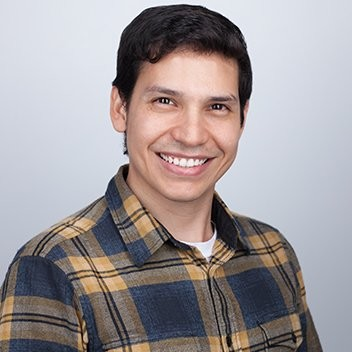

In [256]:
Image("hugo_ramos.jpeg")

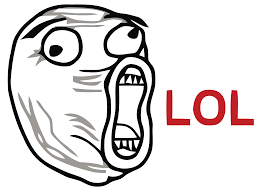

In [249]:
Image("LOL.png")

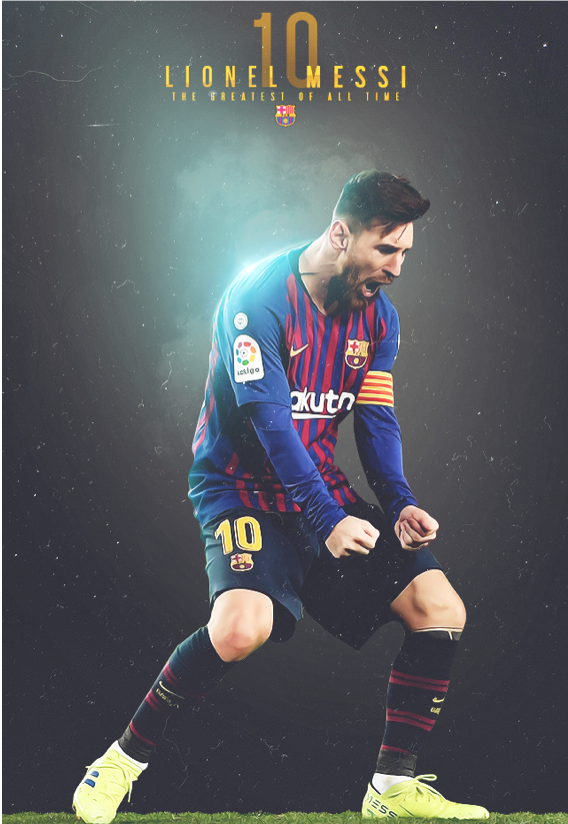

In [260]:
Image("Messi.png")

In [246]:
df_fifa9.head(20)

,short_name,age,overall,potential,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic,Ballon D Or Winner
0,L. Messi,31,94,94,5,4,88.0,91.0,88.0,96.0,32.0,61.0,93.499421
1,Cristiano Ronaldo,33,94,94,5,5,90.0,93.0,81.0,89.0,35.0,79.0,92.406322
2,E. Hazard,27,91,91,4,4,91.0,82.0,86.0,94.0,35.0,67.0,90.658484
3,A. Griezmann,27,89,90,4,4,86.0,86.0,81.0,89.0,50.0,70.0,88.520574
4,S. Agüero,30,89,89,4,4,84.0,89.0,76.0,89.0,28.0,73.0,88.201377
5,R. Lewandowski,29,90,90,4,4,78.0,89.0,75.0,85.0,41.0,82.0,87.844588
6,V. van Dijk,26,85,87,3,2,71.0,60.0,67.0,70.0,85.0,84.0,87.078572
7,Marquinhos,24,84,89,3,2,75.0,38.0,69.0,67.0,85.0,76.0,86.342586
8,Bernardo Silva,23,84,90,2,4,78.0,72.0,83.0,89.0,46.0,58.0,85.721959
9,M. Salah,26,88,89,3,4,92.0,84.0,79.0,89.0,45.0,72.0,85.611645
